In [1]:
!pip list

Package                      Version
---------------------------- ---------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.5.0
certifi                      2024.8.30
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.0
cycler                       0.12.1
debugpy                      1.8.5
decorator                    5.1.1
exceptiongroup               1.2.2
executing                    2.1.0
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.4.0
google-auth                  2.34.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.66.1
h5py                         3.11.0
idna                         3.10
importlib_metadata           8.5.0
ipykernel                    6.29.5
ipython                      8.27.0
je

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.10.0


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import cv2 
from PIL import Image
tf.random.set_seed(3)
from keras.datasets import mnist
from tensorflow.math import confusion_matrix as cft #type:ignore


In [6]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

In [7]:
type(X_train)

numpy.ndarray

In [8]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [9]:
print(X_train[10].shape)

(28, 28)


5


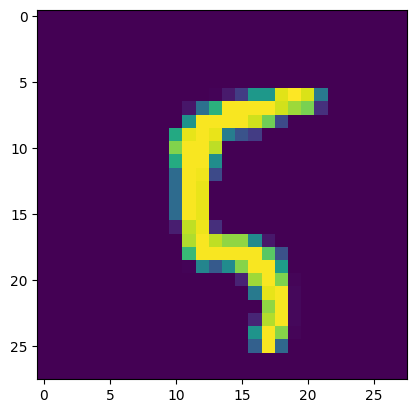

In [10]:
#displaying the image 
plt.imshow(X_train[100])
print(Y_train[100])

In [11]:
print(np.unique(Y_test))
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [12]:
#normalization/Scaling
X_train =X_train/255
X_test =X_test/255

In [13]:
print(X_train[10].shape)

(28, 28)


In [14]:
#Build Neural Networks
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
#Build Neural Networks test
t_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

In [15]:
gpu_name = tf.config.experimental.get_device_details(tf.config.list_physical_devices('GPU')[0])['device_name']
print(gpu_name)
print(tf.__version__)

NVIDIA GeForce GTX 1650
2.10.0


In [16]:
#compile the network

model.compile(optimizer='adamax',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [17]:
model.fit(X_train,Y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4334 - accuracy: 0.8803
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2277 - accuracy: 0.9350
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1860 - accuracy: 0.9456
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1603 - accuracy: 0.9536
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1420 - accuracy: 0.9586
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1272 - accuracy: 0.9633
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1168 - accuracy: 0.9656
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1066 - accuracy: 0.9691
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0988 - accuracy: 0.9715
Epoch 10/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.091

In [18]:
loss , accuracy = model.evaluate(X_test,Y_test)
print(accuracy*100)

313/313 [==============================] - 1s 2ms/step - loss: 0.0989 - accuracy: 0.9695
96.95000052452087


* Testing The Model

2


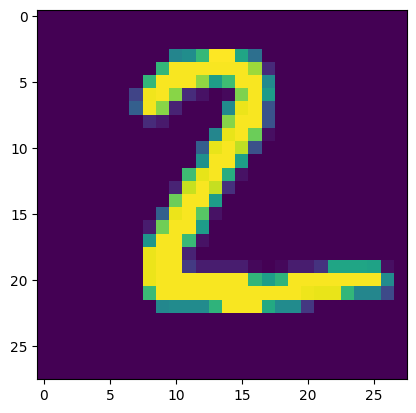

In [19]:
plt.imshow(X_test[1])
print(Y_test[1])

In [20]:
y_pred = model.predict(X_test)
# np.argmax(y_pred)

313/313 [==============================] - 0s 1ms/step


In [21]:
print(y_pred[0]) #maximum one of the list values is the answer

[9.8824844e-02 2.0340942e-05 2.8116962e-02 1.7080551e-01 1.6536430e-03
 2.9009596e-01 1.8778771e-08 9.9959153e-01 2.2532897e-02 6.2309451e-02]


In [22]:
y_pred_for_all = [np.argmax(i) for i in y_pred]
print(y_pred_for_all)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

* Y_test  = true_labels<br>
* y_pred_for_all = pred_labels

In [23]:
import pickle as pkl
pkl.dump(model,open("../model/mnist_rnn.pkl","wb"))

INFO:tensorflow:Assets written to: ram://32e1da98-c0c6-4aa2-b48c-dc9540e09ebb/assets


In [24]:
#confusion <matrix>
confu_mat = cft(Y_test,y_pred_for_all)
confu_mat = np.array(confu_mat)
confu_mat

array([[ 969,    0,    1,    2,    1,    4,    0,    1,    1,    1],
       [   0, 1122,    4,    1,    0,    1,    2,    1,    4,    0],
       [   3,    2, 1007,    6,    4,    0,    1,    3,    6,    0],
       [   0,    0,    4,  979,    1,   14,    0,    4,    4,    4],
       [   2,    0,    5,    1,  959,    0,    3,    4,    1,    7],
       [   3,    0,    1,    7,    1,  872,    4,    0,    4,    0],
       [   8,    3,    4,    1,    7,   17,  914,    0,    4,    0],
       [   0,    3,   11,    5,    3,    1,    0,  991,    1,   13],
       [   6,    1,    3,   13,    6,    8,    4,    4,  925,    4],
       [   9,    5,    1,   10,   14,    6,    0,    4,    3,  957]])

In [25]:
# plt.figure(figsize=(15,7))
# sns.heatmap(confu_mat)
# plt.ylabel('True Labels')
# # plt.xlabel('Pred Labels')

predictive system

In [1]:
import cv2

In [2]:
image_path = "../data/test/img_686.jpg" 

In [3]:
input_image = cv2.imread(image_path)
print(type(input_image))
print(input_image)

<class 'numpy.ndarray'>
[[[9 9 9]
  [2 2 2]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [3 3 3]
  [3 3 3]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 1 1]
  [0 0 0]
  [5 5 5]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
plt.imshow(input_image)

NameError: name 'plt' is not defined

In [52]:
input_image.shape

(28, 28, 3)

In [53]:
input_image = cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

(28, 28)


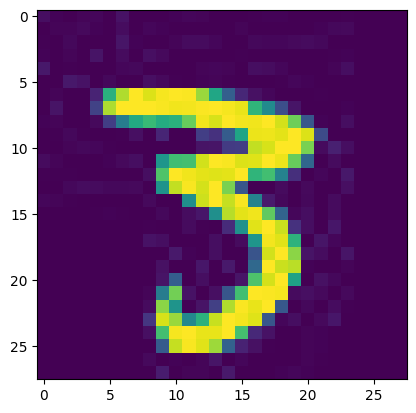

In [54]:
print(input_image.shape)
plt.imshow(input_image)

In [55]:
test_img = input_image/255

In [56]:
image_reshaped = np.reshape(test_img,[1,28,28])

In [57]:
pred = model.predict(image_reshaped)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[9.0650487e-04 9.0822068e-06 5.0416269e-04 9.9990737e-01 6.4615742e-05
  9.1534323e-01 5.2734896e-09 2.8624022e-03 1.3846123e-01 2.5825657e-02]]


In [58]:
np.argmax(pred)

3

#### Predictive sysytem

In [59]:
dir = "../data/test/"
input_path = input("Path of the input image :") # use the data/test folder for the images
print( dir + input_path)

../data/test/img_686.jpg


In [60]:
dir = "../data/test/"
input_path = input("Path of the input image :") # use the data/test folder for the images
input_image_path = dir + input_path
test_img = cv2.imread(input_image_path)
greyscale = cv2.cvtColor(test_img,cv2.COLOR_RGB2GRAY)
test_img = greyscale/255
image_reshape = np.reshape(test_img,[1,28,28])
print("The number in the image is:",np.argmax(model.predict(image_reshape)))

1/1 [==============================] - 0s 38ms/step
The number in the image is: 3
